Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

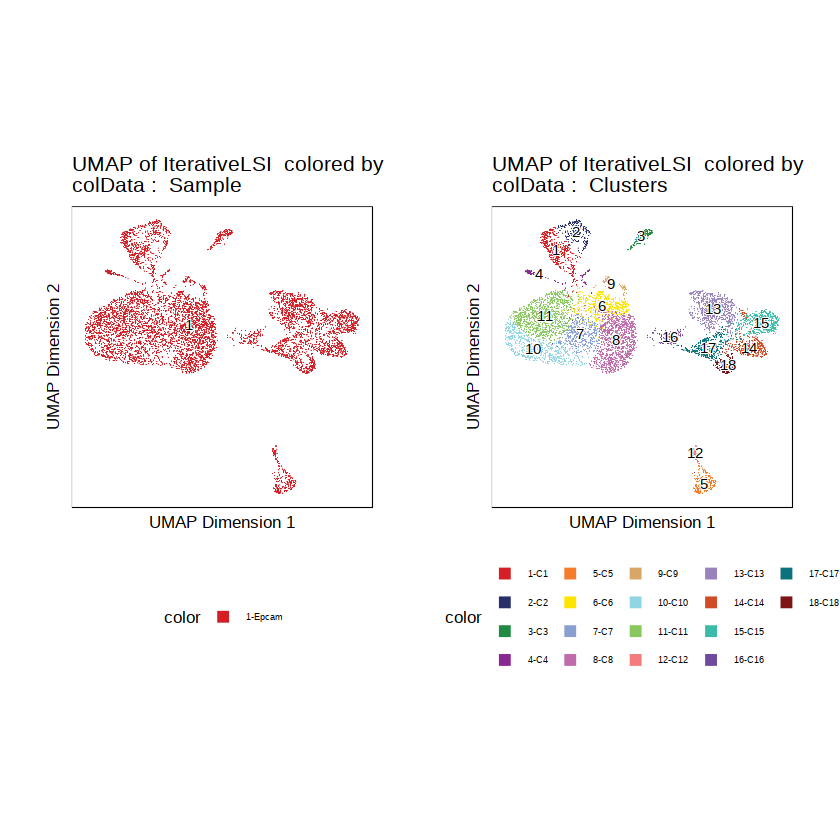

In [1]:
library(ArchR)
inputFiles<-'/shen/shenlabstore3/neng/20200509_scATAC_sneddon/EpcamFragments/outs/fragments.tsv.gz'
name<-'Epcam'
addArchRGenome("hg38")

projEpcam2<-loadArchRProject(path='/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam2',force=TRUE, showLogo=FALSE)
p1 <- plotEmbedding(ArchRProj = projEpcam2, colorBy = "cellColData", name = "Sample", embedding = "UMAP")
p2 <- plotEmbedding(ArchRProj = projEpcam2, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")

ggAlignPlots(p1, p2, type = "h")
load('/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam2/markerGS.Rdata')
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.
01 & Log2FC >= 1.25")

markerGenes <-  c('GAPDH','ACTB','INS','INS-IGF2','SCG5','NKX6-1',
  'PDX1','GCG', 'IRX2', 'IRX1', 'ARX',
  'MAFB', 'TTR','SST','PPY','GHRL',
  'NEUROG3','FEV','SUSD2','CPA1',
  'PTF1A', 'CPA2','REG1A','KRT19',
  'CFTR','SOX9','SPP1','VIM',
  'COL1A1','COL3A1','PTPRC','RAC2',
  'SOX10','WT1',
  'CAV1','PECAM1','EPCAM')

load('/shen/shenlabstore3/neng/20200509_scATAC_sneddon/SeuratData/Twelve_wpc_Epcam.rds')
outDir<-'/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam2'
projEpcam3 <- addGeneIntegrationMatrix(
    ArchRProj = projEpcam2, 
    useMatrix = "GeneScoreMatrix",
    matrixName = "GIM-Twelve_wpc_Epcam",
    reducedDims = "IterativeLSI",
    seRNA = Twelve_wpc_Epcam,
    addToArrow=TRUE,
    force=TRUE,
    groupRNA = "Cell_Type",
    nameCell = "predictedCell",
    nameGroup = "predictedGroup",
    nameScore = "predictedScore")


[1] "C10" "C1"  "C3"  "C7"  "C8"  "C16" "C14" "C13" "C2"  "C11" "C15" "C5" 
[13] "C4"  "C17" "C18" "C12" "C6"  "C9"

[1] "Immature_Acinar"      "Mesenchymal"          "Endothelial"         
 [4] "Immature_Acinar"      "Ductal"               "Alpha"               
 [7] "Delta"                "Beta_1"               "Mesenchymal"         
[10] "Proliferating_Acinar" "Alpha"                "Neuronal"            
[13] "Immune"               "Endocrine_Progenitor" "Epsilon"             
[16] "Neuronal"             "Ductal"               "Immature_Acinar"

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4729366b67d-Date-2020-05-26_Time-19-54-58.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4729366b67d-Date-2020-05-26_Time-19-54-58.log

Warning message in normalizePath(outputDirectory):
“path[1]="/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam3": No such file or directory”
Copying ArchRProject to new outputDirectory : /shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam3

Copying Arrow Files...

Copying Arrow Files (1 of 1)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 4): Embeddings

Copying Other Files (2 of 4): IterativeLSI

Copying Other Files (3 of 4): markerGS.Rdata

Copying Other Files (4 of 4): RNAIntegration

Saving ArchRProject...



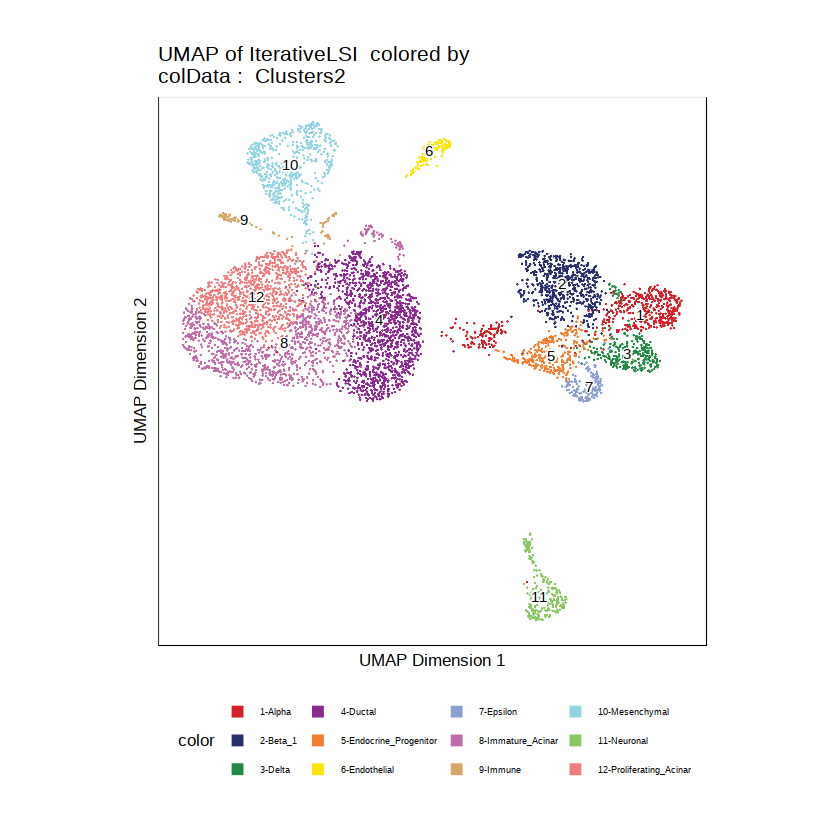

In [4]:
cM <- confusionMatrix(projEpcam3$Clusters, projEpcam3$predictedGroup)
labelOld <- rownames(cM)
labelOld
labelNew <- colnames(cM)[apply(cM, 1, which.max)]
labelNew
projEpcam3$Clusters2<-mapLabels(projEpcam3$Clusters, newLabels= labelNew, oldLabels=labelOld)
p1 <- plotEmbedding(projEpcam3, colorBy = "cellColData", name = "Clusters2")
p1
saveArchRProject(ArchRProj = projEpcam3, outputDirectory = "/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam3", load = FALSE)


In [1]:
library(ArchR)
projEpcam3<-loadArchRProject(path='/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEpcam3',force=TRUE, showLogo=FALSE)

projEndo1<-projEpcam3[which(projEpcam3$Clusters2=='Beta_1' | 
                 projEpcam3$Clusters2=='Delta' | 
                 projEpcam3$Clusters2=='Endocrine_Progenitor' |
                 projEpcam3$Clusters2=='Epsilon' |
                 projEpcam3$Clusters2=='Alpha')]

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-34e96bef524e-Date-2020-05-27_Time-00-18-56.log
If there is an issue, please report to github with logFile!

2020-05-27 00:18:57 : Computing Total Accessibility Across All Features, 0.001 mins elapsed.

2020-05-27 00:19:00 : Computing Top Features, 0.063 mins elapsed.

###########
2020-05-27 00:19:01 : Running LSI (1 of 2) on Top Features, 0.074 mins elapsed.
###########

2020-05-27 00:19:01 : Creating Partial Matrix, 0.074 mins elapsed.

2020-05-27 00:19:18 : Computing LSI, 0.353 mins elapsed.

2020-05-27 00:19:25 : Identifying Clusters, 0.476 mins elapsed.

2020-05-27 00:19:28 : Identified 10 Clusters, 0.523 mins elapsed.

2020-05-27 00:19:28 : Saving LSI Iteration, 0.523 mins elapsed.

2020-05-27 00:19:39 : Creating Cluster Matrix on the total Group Features, 0.701 mins elapsed.

2020-05-27 00:20:14 : Computing Variable Features, 1.293 mins elapsed.

###########
2020-05-27 00:20:15 : Running LSI (2 of 2) on Variab

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1934
Number of edges: 69961

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7216
Number of communities: 15
Elapsed time: 0 seconds


2020-05-27 00:20:31 : Testing Outlier Clusters, 0.041 mins elapsed.

2020-05-27 00:20:31 : Assigning Cluster Names to 15 Clusters, 0.041 mins elapsed.

2020-05-27 00:20:31 : Finished addClusters, 0.042 mins elapsed.



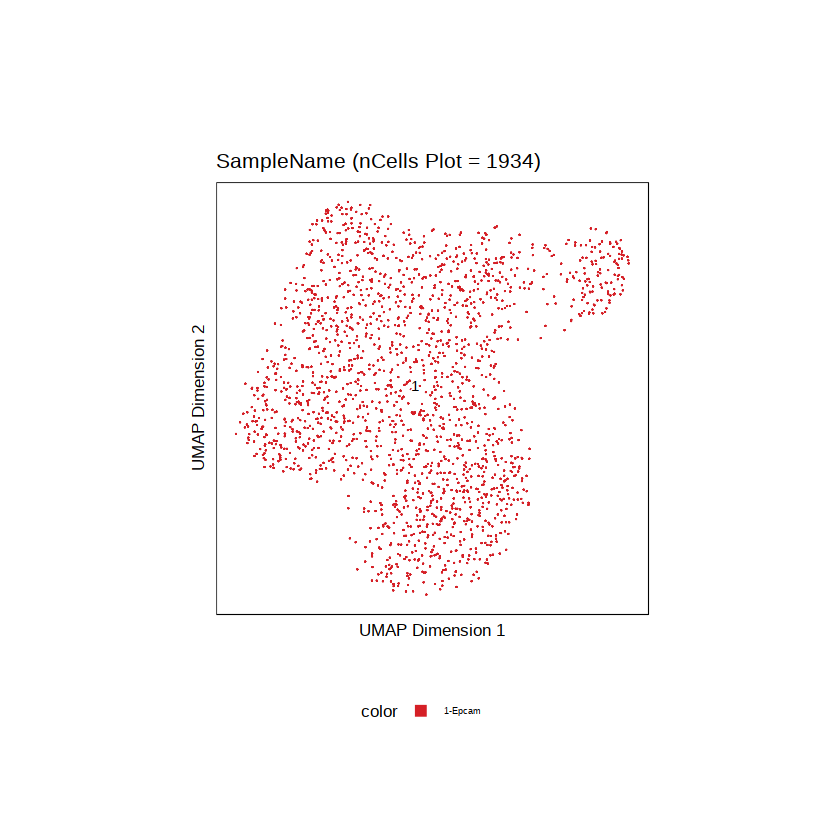

In [14]:
projEndo1<-addIterativeLSI(
    ArchRProj = projEndo1,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI-Endo", 
    iterations = 2, 
    filterQuantile = 0.96,
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(1.8), 
        sampleCells = 2000, 
        n.start = 5), 
    varFeatures = 10000, 
    dimsToUse = 1:14,
    force=TRUE
)
projEndo1 <- addClusters(
    input = projEndo1,
    reducedDims = "IterativeLSI-Endo",
    method = "Seurat",
    name = "Clusters",
    resolution=1.8,
    force=TRUE
)


00:20:36 UMAP embedding parameters a = 0.7669 b = 1.223

00:20:36 Read 1934 rows and found 10 numeric columns

00:20:36 Using Annoy for neighbor search, n_neighbors = 15

00:20:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

00:20:37 Writing NN index file to temp file /tmp/RtmpZdurUX/file34e9148812a

00:20:37 Searching Annoy index using 16 threads, search_k = 1500

00:20:37 Annoy recall = 100%

00:20:37 Commencing smooth kNN distance calibration using 16 threads

00:20:38 Initializing from normalized Laplacian + noise

00:20:38 Commencing optimization for 500 epochs, with 38536 positive edges

00:20:44 Optimization finished

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-34e924d44b44-Date-2020-05-27_Time-00-20-44.log
If there is an issue, please report to github 

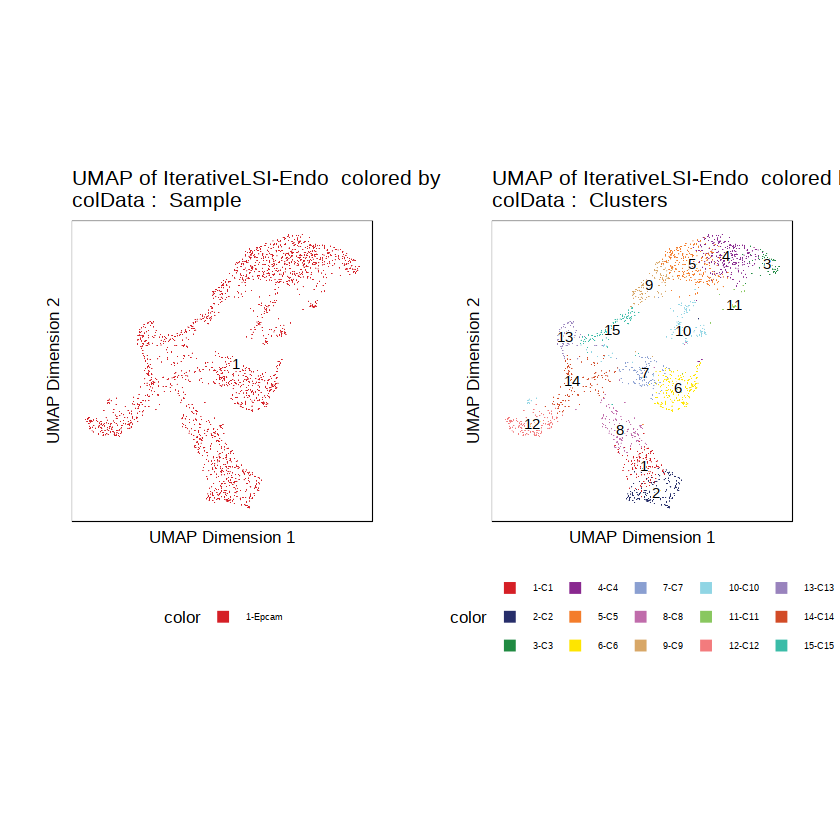

In [15]:
projEndo1 <- addUMAP(
    ArchRProj = projEndo1, 
    reducedDims = "IterativeLSI-Endo", 
    name = "UMAP", 
    nNeighbors = 15,
    dimsToUse = 1:10,
    force=TRUE,
    metric = "cosine"
)

p1 <- plotEmbedding(ArchRProj = projEndo1, colorBy = "cellColData", name = "Sample", embedding = "UMAP")
p2 <- plotEmbedding(ArchRProj = projEndo1, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")

ggAlignPlots(p1, p2, type = "h")

In [16]:
load('SeuratData/Twelve_wpc_Sample3_Epcam_endocrine.Rdata')

In [17]:
Twelve_wpc_Sample3_Epcam_endocrine$active.ident<-Twelve_wpc_Sample3_Epcam_endocrine@active.ident

In [18]:
outDir<-'/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo1'
projEndo1 <- addGeneIntegrationMatrix(
    ArchRProj = projEndo1, 
    useMatrix = "GeneScoreMatrix",
    matrixName = "GIM-CellFindR",
    reducedDims = "IterativeLSI",
    seRNA = Twelve_wpc_Sample3_Epcam_endocrine,
    addToArrow=TRUE,
    force=TRUE,
    groupRNA = "active.ident",
    nameCell = "predictedCell",
    nameGroup = "predictedGroup",
    nameScore = "predictedScore")

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-34e96235289-Date-2020-05-27_Time-00-21-05.log
If there is an issue, please report to github with logFile!

2020-05-27 00:21:06 : Running Seurat's Integration Stuart* et al 2019, 0.004 mins elapsed.

2020-05-27 00:21:06 : Checking ATAC Input, 0.01 mins elapsed.

2020-05-27 00:21:06 : Checking RNA Input, 0.01 mins elapsed.

2020-05-27 00:21:08 : Creating Integration Blocks, 0.039 mins elapsed.

2020-05-27 00:21:08 : Prepping Interation Data, 0.039 mins elapsed.

2020-05-27 00:21:08 : Computing Integration in 1 Integration Blocks!, 0 mins elapsed.

2020-05-27 00:21:08 : Block (1 of 1) : Computing Integration, 0 mins elapsed.

2020-05-27 00:21:09 : Block (1 of 1) : Identifying Variable Genes, 0.015 mins elapsed.

2020-05-27 00:21:11 : Block (1 of 1) : Getting GeneScoreMatrix, 0.05 mins elapsed.

2020-05-27 00:21:26 : Block (1 of 1) : Imputing GeneScoreMatrix, 0.303 mins elapsed.

Getting ImputeWeights

2020-05-27 00:21:34 : Block 

[1] "C10" "C6"  "C4"  "C8"  "C7"  "C13" "C12" "C5"  "C1"  "C2"  "C9"  "C14"
[13] "C15" "C3"  "C11"

[1] "Beta"                "Delta"               "Beta"               
 [4] "Alpha"               "Delta"               "Common_Progenitor"  
 [7] "Epsilon"             "Beta"                "Alpha"              
[10] "Alpha"               "Beta"                "PreAlpha-PreEpsilon"
[13] "FEV-High"            "Beta"                "Beta"

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-34e930a990ff-Date-2020-05-27_Time-00-25-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-34e930a990ff-Date-2020-05-27_Time-00-25-45.log



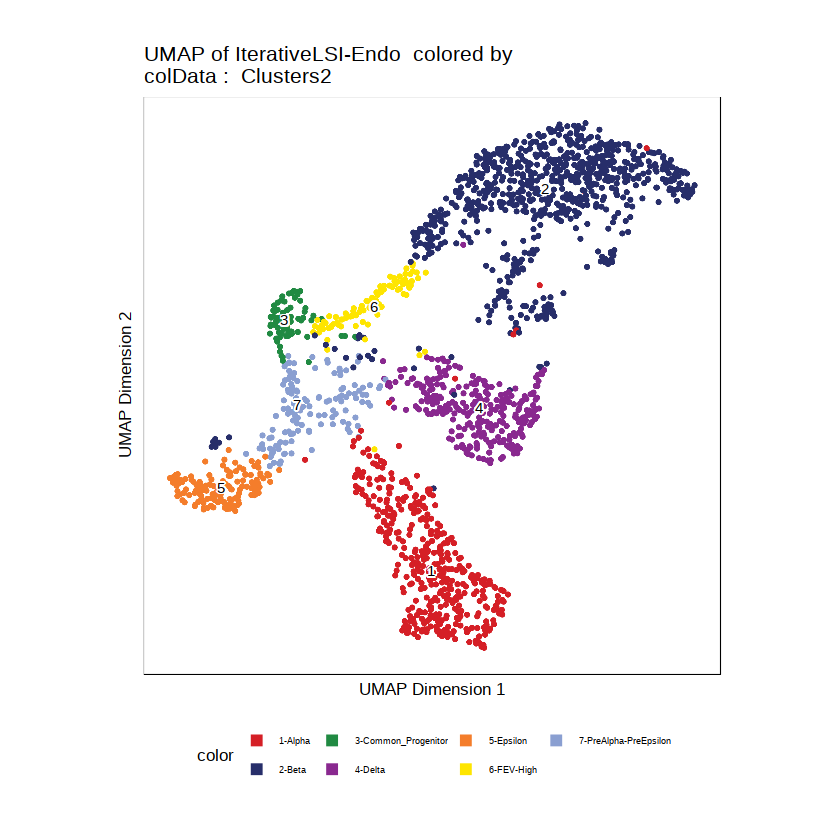

In [19]:
cM <- confusionMatrix(projEndo1$Clusters, projEndo1$predictedGroup)
labelOld <- rownames(cM)
labelOld
labelNew <- colnames(cM)[apply(cM, 1, which.max)]
labelNew
projEndo1$Clusters2<-mapLabels(projEndo1$Clusters, newLabels= labelNew, oldLabels=labelOld)


p1 <- plotEmbedding(projEndo1, colorBy = "cellColData", name = "Clusters2", size=1.5)
p1

In [20]:
saveArchRProject(ArchRProj = projEndo1, outputDirectory = "/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo1", load = FALSE)


Copying ArchRProject to new outputDirectory : /shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo1

Copying Arrow Files...

Copying Arrow Files (1 of 1)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 5): Embeddings

Copying Other Files (2 of 5): IterativeLSI

Copying Other Files (3 of 5): IterativeLSI-Endo

Copying Other Files (4 of 5): markerGS.Rdata

Copying Other Files (5 of 5): RNAIntegration

Saving ArchRProject...



In [ ]:
library(ArchR)
projEndo1<-loadArchRProject(path='/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo1',force=TRUE, showLogo=FALSE)
projEndo2 <- addGroupCoverages(ArchRProj = projEndo1, groupBy = "Clusters2")
pathToMacs2 <- findMacs2()
projEndo2 <- addReproduciblePeakSet(
    ArchRProj = projEndo2, 
    groupBy = "Clusters2", 
    pathToMacs2 = pathToMacs2
)
projEndo2<-addPeakMatrix(projEndo2)
saveArchRProject(ArchRProj = projEndo2, outputDirectory = "/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo2", load = FALSE)


Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [1]:
library(ArchR)
projEndo2<-loadArchRProject(path='/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo2',force=TRUE, showLogo=FALSE)
trajectory<-c("Common_Progenitor","FEV-High","Beta")
projEndo2 <- addTrajectory(
    ArchRProj = projEndo2, 
    name = "Beta", 
    groupBy = "Clusters2",
    trajectory = trajectory, 
    embedding = "UMAP", 
    force = TRUE
)
p <- plotTrajectory(projEndo2, trajectory = "Beta", colorBy = "cellColData", name = "Beta")
projEndo2 <- addImputeWeights(projEndo2)

p1 <- plotTrajectory(projEndo2, trajectory = "Beta", colorBy = "GeneScoreMatrix", name = "NKX6-1", continuousSet = "horizonExtra")
p2 <- plotTrajectory(projEndo2, trajectory = "Beta", colorBy = "GIM-CellFindR", name = "NKX6-1", continuousSet = "blueYellow")

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-428f5ba7f140-Date-2020-05-28_Time-18-04-37.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2020-05-28 18:04:38 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 1087 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-428f5ba7f140-Date-2020-05-28_Time-18-04-37.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-428f198d02b6-Date-2020-05-28_Time-18-04-41.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2020-05-28 18:04:41 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 1087 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR

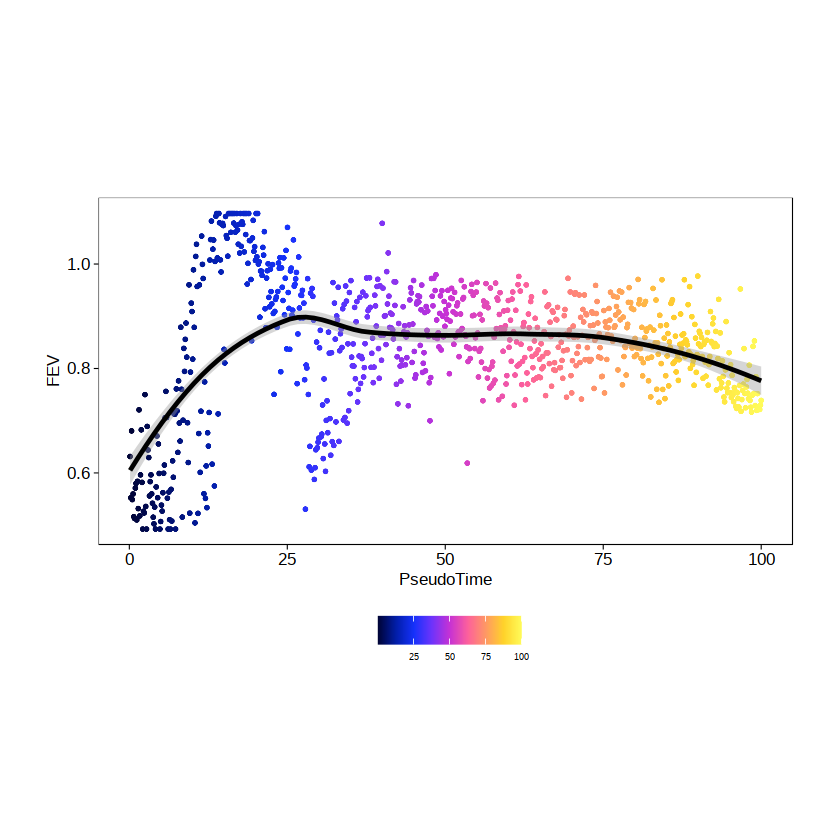

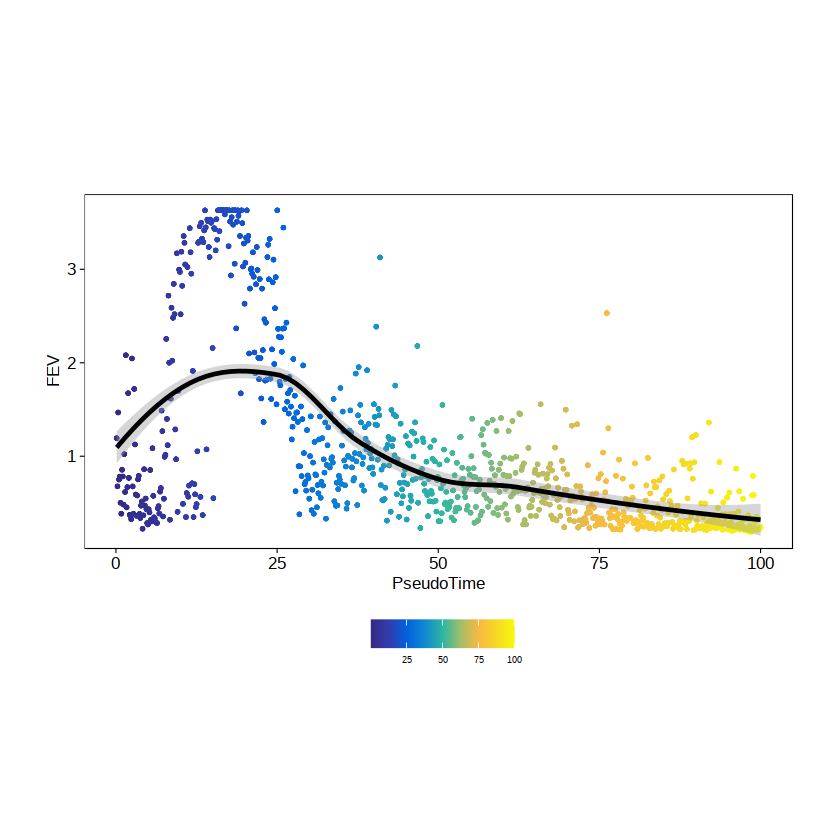

In [44]:
testGenes<-c('MAFA', 'MAFB', 'INS', 'NEUROG3', 'FOXA2', 'ASCL1', 'NKX6-1', 'SOX9', 'HES6', 'PAX6', 'GATA4', 'GATA6','PDX1', 'ISL1', 'MNX1', 'NKX2-2','PAX4','ARX','GCG')
testGenes<-c('FEV')

for (gene in testGenes){
    p1 <- plotTrajectory(projEndo2, trajectory = "Beta", colorBy = "GeneScoreMatrix", name = gene, continuousSet = "horizonExtra",log2Norm = TRUE,)
    p2 <- plotTrajectory(projEndo2, trajectory = "Beta", colorBy = "GIM-CellFindR", name = gene, continuousSet = "blueYellow",log2Norm=TRUE)
}
p1[[2]]
p2[[2]]

In [1]:
trajGSM  <- getTrajectory(ArchRProj = projEndo2, name = "Beta", useMatrix = "GeneScoreMatrix", log2Norm = FALSE)
trajGIM  <- getTrajectory(ArchRProj = projEndo2, name = "Beta", useMatrix = "GIM-CellFindR", log2Norm = FALSE)
corGSM_GIM <- correlateTrajectories(trajGSM, trajGIM)

ERROR: Error in getTrajectory(ArchRProj = projEndo2, name = "Beta", useMatrix = "GeneScoreMatrix", : could not find function "getTrajectory"


In [2]:
corGSM_GIM

ERROR: Error in eval(expr, envir, enclos): object 'corGSM_GIM' not found


In [9]:
trajGSM2 <- trajGSM[corGSM_GIM[[1]]$name1, ]
trajGIM2 <- trajGIM[corGSM_GIM[[1]]$name2, ]

trajCombined <- trajGSM2
assay(trajCombined) <- t(apply(assay(trajGSM2), 1, scale)) + t(apply(assay(trajGIM2), 1, scale))

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f51a766b-Date-2020-05-28_Time-17-22-30.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f51a766b-Date-2020-05-28_Time-17-22-30.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f32bd6b99-Date-2020-05-28_Time-17-22-30.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f32bd6b99-Date-2020-05-28_Time-17-22-30.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f3cda18a2-Date-2020-05-28_Time-17-22-31.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f3cda18a2-Date-2020-05-28_Time-17-22-31.log



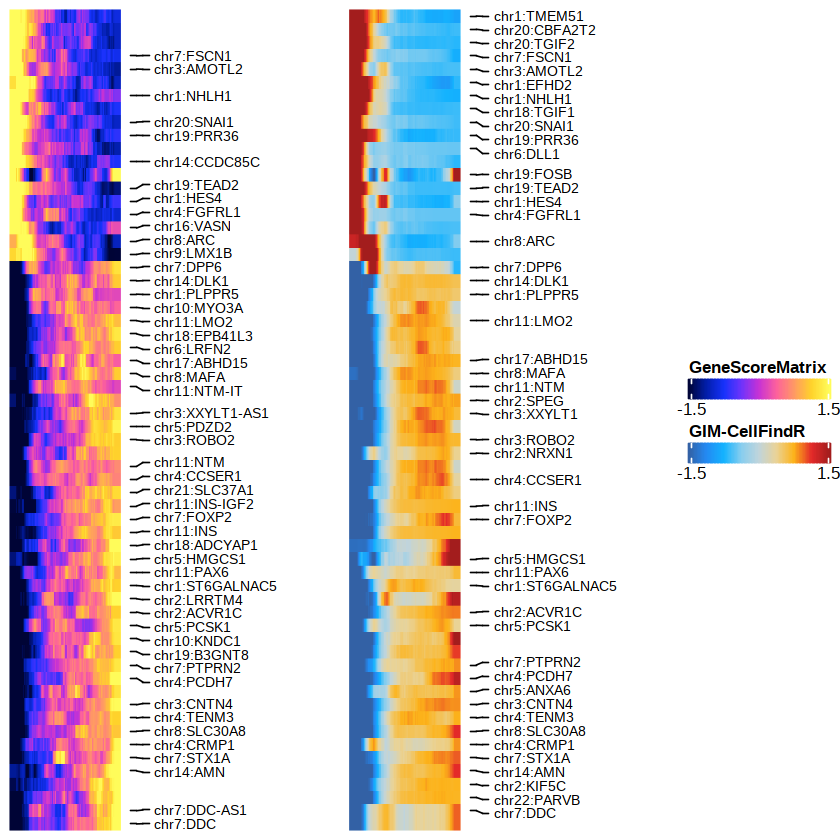

In [28]:
combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)
rowOrder <- match(rownames(combinedMat), rownames(trajGSM2))

ht1 <- plotTrajectoryHeatmap(trajGSM2,  pal = paletteContinuous(set = "horizonExtra"),  varCutOff = 0, rowOrder = rowOrder)
ht2 <- plotTrajectoryHeatmap(trajGIM2,  pal = paletteContinuous(set = "solarExtra"),  varCutOff = 0, rowOrder = rowOrder)
plotPDF(ht1,type="h", name = paste0("Correlated_ATAC_Betatrajectory.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)
plotPDF(ht2,type="h", name = paste0("Correlated_RNA_Betatrajectory.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)

In [39]:
plotPDF(ht1+ht2,type="h", name = paste0("Correlated_Betatrajectory.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 7, height = 8)

Plotting ComplexHeatmap!

Plotting Other



[1] "h"


In [40]:
markersGS <- getMarkerFeatures(
    ArchRProj = projEndo2, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "Clusters2",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.05 & Log2FC >= 1.25")
markerGenes <-  c('GAPDH','ACTB','INS','INS-IGF2','SCG5','NKX6-1',
  'PDX1','GCG', 'IRX2', 'IRX1', 'ARX',
  'MAFB', 'TTR','SST','PPY','GHRL',
  'NEUROG3','FEV','SUSD2','CPA1',
  'PTF1A', 'CPA2','REG1A','KRT19',
  'CFTR','SOX9','SPP1','VIM',
  'COL1A1','COL3A1','PTPRC','RAC2',
  'SOX10','WT1',
  'CAV1','PECAM1','EPCAM')
markerlist<-c(markerList$Beta$name,markerList$`FEV-High`$name,markerList$Common_Progenitor$name)
markerlist


ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-428f36e940fb-Date-2020-05-28_Time-17-32-44.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2020-05-28 17:32:44 : Matching Known Biases, 0.002 mins elapsed.

2020-05-28 17:32:46 : Computing Pairwise Tests (1 of 7), 0.026 mins elapsed.

2020-05-28 17:33:03 : Computing Pairwise Tests (2 of 7), 0.32 mins elapsed.

2020-05-28 17:33:23 : Computing Pairwise Tests (3 of 7), 0.646 mins elapsed.

2020-05-28 17:33:36 : Computing Pairwise Tests (4 of 7), 0.869 mins elapsed.

2020-05-28 17:33:52 : Computing Pairwise Tests (5 of 7), 1.127 mins elapsed.

2020-05-28 17:34:06 : Computing Pairwise Tests (6 of 7), 1.359 mins elapsed.

2020-05-28 17:34:19 : Computing Pairwise Tests (7 of 7), 1.585 mins elapsed.

###########
2020-05-28 17:34:33 : Completed Pairwise Tests, 1.815 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-428f36e940fb-Date-2020-05-28_Time-1

[1] "IGLON5"       "INS"          "MIR298"       "XXYLT1-AS1"   "BTNL3"       
 [6] "DCAF4L1"      "TRPM2-AS"     "MIR379"       "MIR296"       "SNORD114-31" 
[11] "MIR6728"      "MIR4700"      "MIR433"       "MIR431"       "MIR127"      
[16] "MIR432"       "MIR136"       "MIR541"       "MIR496"       "MIR369"      
[21] "MIR410"       "MIR377"       "LINC01676"    "MIR412"       "MIR409"      
[26] "MIR323B"      "MIR758"       "MIR154"       "MIR656"       "TRPV1"       
[31] "SPRR2A"       "MIR323A"      "MIR1197"      "MIR329-1"     "MIR485"      
[36] "MIR668"       "MIR380"       "MIR329-2"     "SNORD114-18"  "KRTAP5-8"    
[41] "SNORD114-20"  "SNORD114-22"  "OR1N2"        "SNORD114-24"  "SNORD114-25" 
[46] "SNORD114-19"  "TAAR8"        "ACSM2A"       "SLC7A13"      "TAS2R8"      
[51] "LILRA2"       "MIR6750"      "OR1E2"        "MYH4"         "MYEOV"       
[56] "KRTAP29-1"    "HLA-DQA2"     "KRTAP16-1"    "LOC101927131" "DNAJB8-AS1"  
[61] "TNFRSF18"     "LOC541472"    "MIR6510"      "MIR6771"      "NHLH1"       
[66] "OR9K2"        "C10orf71-AS1" "LINC01255"    "MIR5681A"     "PGAM2"       
[71] "MIR4763"      "LOC101928844" "MIR7110"      "ELFN1"        "SLC17A7"     
[76] "SEC22A"       "PRR36"        "MIR4534"      "DRAXIN"       "EPHA2"       
[81] "SNORD4B"      "SERPING1"     "LINC01451"    "SNORD4A"      "RAB34"       
[86] "SNORD42A"     "TGIF1"        "LINC00051"    "LOC284865"    "SNORD42B"    
[91] "FAM167B"      "QSER1"        "RPL23A"       "MIR505"       "IL17REL"     
[96] "LAD1"         "ANKK1"        "CELA3A"

In [20]:
heatmapGS <- markerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.01 & Log2FC >= 1.25", 
  labelMarkers = markerlist,
  transpose = TRUE
)
#markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.01 & Log2FC >= 1.25")
ComplexHeatmap::draw(heatmapGS, heatmap_legend_side = "bot", annotation_legend_side = "bot")

Warning message:
“'markerHeatmap' is deprecated.
Use 'plotMarkerHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-512f4b7744eb-Date-2020-05-27_Time-11-06-01.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

Alpha:

	MIR6735, OR51A7, OR51A4, HRASLS2, FGF23, KLRC3, KLRC2, MIR2681, MIR4705, COL4A2-AS1, LOC101929586, PRC1-AS1, GCG, LOC101929532, FAP, MIR4775, SH3BP5-AS1, IL17A, SCARNA23, FMR1NB

Beta:

	MIR6728, LINC01676, SPRR2A, INS, KRTAP5-8, MIR4700, MIR431, MIR433, MIR127, MIR432, MIR136, SNORD114-18, SNORD114-20, SNORD114-22, SNORD114-24, SNORD114-25, SNORD114-31, MIR379, MIR380, MIR1197

Common_Progenitor:

	SLC17A7, SEC22A, MIR7110, ELFN1, TNFRSF18, HES3, MIR6728, LINC01654, MIR6735, LOC102723661, LINC01676, LINC00622, SPRR2A, C10orf113, ANK3, MIR609, INS, OR51A7, OR51A4, LOC100506258

Delta:

	LOC102723661, C10orf113, MIR609, OR8G5, LINC00562, SNORD113-1, MYL1, CPB1, SST, MIR877, TAAR1, CBLL2, 

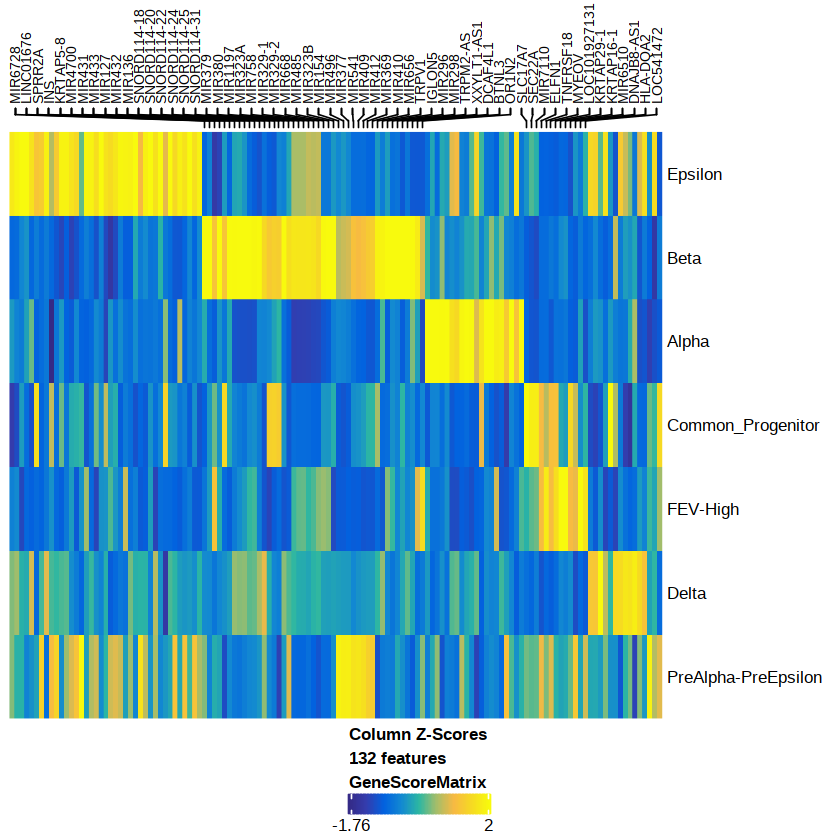

In [21]:

markersGSGIM <- getMarkerFeatures(
    ArchRProj = projEndo2, 
    useMatrix = "GIM-CellFindR", 
    groupBy = "Clusters2",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

In [46]:
indices<-which(rowData(markersGSGIM)$name %in% unlist(markerList)$name)

In [71]:
unlist(markerListGIM)$name

[1] "IRX2"            "IRX1"            "FABP5"           "C5orf38"        
   [5] "GC"              "PDK4"            "ESRRG"           "GLS"            
   [9] "DRAIC"           "CHGA"            "ADH6"            "GCG"            
  [13] "TMEM236"         "SLC6A4"          "HIGD1A"          "C15orf48"       
  [17] "TPD52L1"         "ALDH1A1"         "BAIAP2L2"        "DPP4"           
  [21] "FAP"             "PYY"             "RPS6KA3"         "LDB2"           
  [25] "BTBD11"          "HSD11B1L"        "PDK3"            "GPX3"           
  [29] "SERPINE2"        "IL5RA"           "STK32B"          "UNC93B1"        
  [33] "RNF150"          "ANKRD18A"        "POU6F2"          "KCNK16"         
  [37] "VEGFC"           "INSC"            "CD82"            "SEZ6L"          
  [41] "VSTM2A"          "CKMT1A"          "EDN3"            "CDH23"          
  [45] "FKBP11"          "KCNMB2"          "ZNF467"          "CDHR5"          
  [49] "OSBPL1A"         "FAM166B"         "S100B"           "USP2-AS1"       
  [53] "SMCO4"           "PLK2"            "CSGALNACT1"      "GRIN3A"         
  [57] "IGSF1"           "C2CD4A"          "IFI27L2"         "TMOD1"          
  [61] "GALNTL6"         "IL17A"           "SERPIND1"        "PXK"            
  [65] "HLA-DRB1"        "SYNDIG1L"        "UBE2Q2L"         "SERPINI1"       
  [69] "TDRD9"           "NBL1"            "PPY"             "ENDOD1"         
  [73] "APOBEC3D"        "FBN1"            "C1orf158"        "FGFBP3"         
  [77] "ANKRD18B"        "ZHX1-C8orf76"    "KLRC2"           "KIF23"          
  [81] "NUPR2"           "MSANTD1"         "GRIA3"           "C1orf21"        
  [85] "TTC30A"          "IL6R"            "MAMLD1"          "EPB41L4B"       
  [89] "TMEM56"          "C2CD4B"          "NT5E"            "HIST1H3H"       
  [93] "MGAT4C"          "CRYBA2"          "CD36"            "DCC"            
  [97] "COTL1"           "SPOCK3"          "HS3ST5"          "ERICH3"         
 [101] "IGFBP6"          "MT1X"            "EPS8L3"          "GCNT3"          
 [105] "CLCN2"           "LBH"             "TPPP3"           "KBTBD11"        
 [109] "DCLK1"           "GDA"             "HIST1H2BK"       "KRBOX1"         
 [113] "CTSB"            "KBTBD11-OT1"     "PQLC2L"          "RAB20"          
 [117] "ACKR2"           "SLC4A10"         "C2"              "ARX"            
 [121] "SELENBP1"        "APOC3"           "MORF4L2-AS1"     "RELL2"          
 [125] "NPB"             "FAM209B"         "GPC5-AS1"        "NAGS"           
 [129] "ZAP70"           "C6orf163"        "ZNF341"          "LMO1"           
 [133] "THBS4"           "TTR"             "APOLD1"          "TRIM25"         
 [137] "DHRS2"           "PIP5K1B"         "PRSS50"          "KCNK1"          
 [141] "STC2"            "PTPRT"           "RNF32"           "KCNC4"          
 [145] "IQGAP2"          "KIAA1549L"       "DNAH9"           "ANK2"           
 [149] "FRMPD3"          "PTPRD"           "SNED1"           "CLIP4"          
 [153] "LRRC4B"          "GPR37"           "STAT4"           "ANO9"           
 [157] "FXYD3"           "ABCB10"          "NMB"             "GALNT13"        
 [161] "PPP1R32"         "GUCA2A"          "SYNJ2BP-COX16"   "RILP"           
 [165] "FAM201A"         "ACTL10"          "CD274"           "PDZRN4"         
 [169] "TNFRSF25"        "FPGS"            "EYA1"            "LRRTM2"         
 [173] "CNIH3"           "PPARGC1B"        "TTLL10"          "RCN3"           
 [177] "HMGN5"           "DAB1"            "GPHA2"           "AQP10"          
 [181] "CREG2"           "RAB3IL1"         "VMAC"            "LINC01431"      
 [185] "CPNE4"           "MFAP3L"          "SIRPA"           "NEBL-AS1"       
 [189] "LPAR1"           "FAIM2"           "SLC35F4"         "PLIN3"          
 [193] "SEMA3E"          "CFAP53"          "GPR176"          "LOXL4"          
 [197] "PDE1B"           "FXYD5"           "GUCA2B"          "FAM111B"        
 [201] "VIPR1"           "GLOD5"           "NEURL3"  

In [68]:
markerListGIM<-getMarkers(markersGSGIM, cutOff = "FDR <= 0.01 & Log2FC >= 1.25")

In [89]:
rownames(markerListGIM)

NULL

Warning message:
“'markerHeatmap' is deprecated.
Use 'plotMarkerHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-512f4ba3ef99-Date-2020-05-27_Time-11-50-33.log
If there is an issue, please report to github with logFile!

Identified 4436 markers!

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-512f4ba3ef99-Date-2020-05-27_Time-11-50-33.log



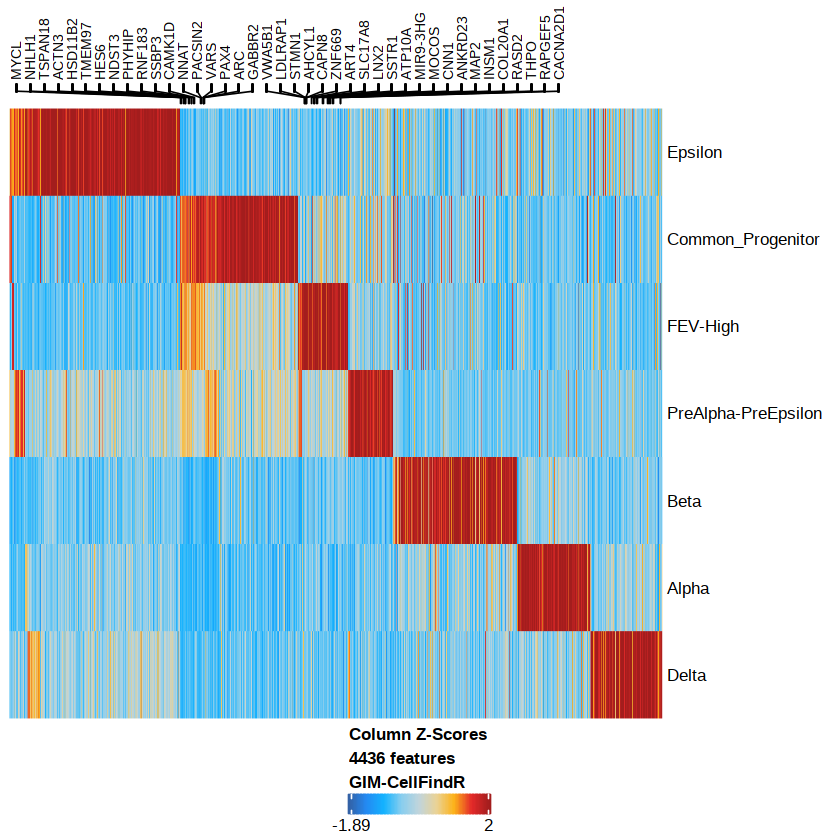

In [85]:
heatmapGSGIM <- markerHeatmap(
  seMarker = markersGSGIM, 
  cutOff = "FDR <= 0.01 & Log2FC >= 1.25", 
  labelMarkers = markerListGIM$FEV$name[1:40],
  transpose = TRUE
)
ComplexHeatmap::draw(heatmapGSGIM, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [61]:

p1 <- plotEmbedding(projEndo2, colorBy = "cellColData", name = "Clusters2", size=1.5)

plotPDF(p1, name = "IterativeLSI-ENDO_UMAP.pdf", ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-512f5e27929e-Date-2020-05-27_Time-11-30-44.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-512f5e27929e-Date-2020-05-27_Time-11-30-44.log

Plotting Ggplot!



In [65]:
p <- plotTrajectory(projEndo2, trajectory = "Beta", colorBy = "cellColData", name = "Beta",size=5)
#plotPDF(p, name = "SupervisedBetaTrajectory.pdf", ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-512f7a01b216-Date-2020-05-27_Time-11-36-06.log
If there is an issue, please report to github with logFile!

Plotting

Warning message:
“Removed 1087 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-512f7a01b216-Date-2020-05-27_Time-11-36-06.log



Warning message:
“Removed 1087 rows containing non-finite values (stat_summary_hex).”


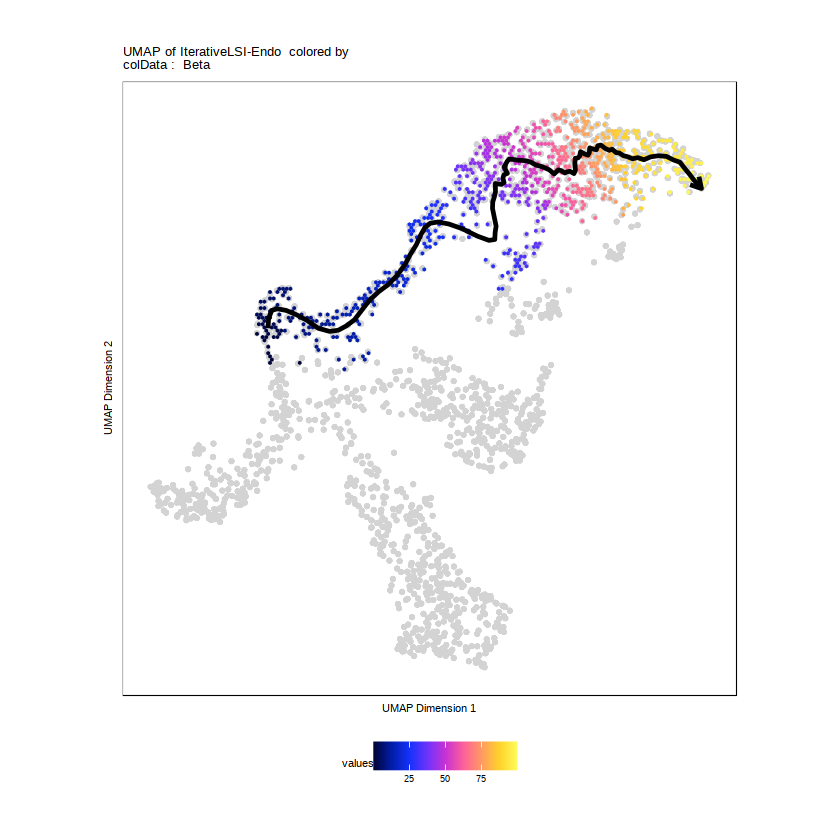

In [66]:
p[[1]]

In [92]:
projEndo2 <- addMotifAnnotations(ArchRProj = projEndo2, motifSet = "cisbp", name = "Motif")

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-512f6a6725e-Date-2020-05-27_Time-11-57-34.log
If there is an issue, please report to github with logFile!

2020-05-27 11:57:35 : Gettting Motif Set, Species : Homo sapiens, 0.008 mins elapsed.

Using version 2 motifs!

2020-05-27 11:57:41 : Finding Motif Positions with motifmatchr!, 0.114 mins elapsed.

2020-05-27 11:58:00 : Creating Motif Overlap Matrix, 0.427 mins elapsed.

2020-05-27 11:58:00 : Finished Getting Motif Info!, 0.428 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-512f6a6725e-Date-2020-05-27_Time-11-57-34.log



In [93]:
markersPeaks <- getMarkerFeatures(
    ArchRProj = projEndo2, 
    useMatrix = "PeakMatrix", 
    groupBy = "Clusters2",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-512f4855b91c-Date-2020-05-27_Time-12-01-25.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2020-05-27 12:01:26 : Matching Known Biases, 0.005 mins elapsed.

2020-05-27 12:01:28 : Computing Pairwise Tests (1 of 7), 0.037 mins elapsed.

2020-05-27 12:02:07 : Computing Pairwise Tests (2 of 7), 0.692 mins elapsed.

2020-05-27 12:02:51 : Computing Pairwise Tests (3 of 7), 1.417 mins elapsed.

2020-05-27 12:03:23 : Computing Pairwise Tests (4 of 7), 1.95 mins elapsed.

2020-05-27 12:03:56 : Computing Pairwise Tests (5 of 7), 2.495 mins elapsed.

2020-05-27 12:04:19 : Computing Pairwise Tests (6 of 7), 2.883 mins elapsed.

2020-05-27 12:04:44 : Computing Pairwise Tests (7 of 7), 3.297 mins elapsed.

###########
2020-05-27 12:05:08 : Completed Pairwise Tests, 3.694 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-512f4855b91c-Date-2020-05-27_Time-

In [94]:
markerList <- getMarkers(markersPeaks, cutOff = "FDR <= 0.01 & Log2FC >= 1")
markerList


List of length 7
names(7): Alpha Beta Common_Progenitor Delta Epsilon FEV-High PreAlpha-PreEpsilon

In [99]:
heatmapPeaks <- markerHeatmap(
  seMarker = markersPeaks, 
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5",
  transpose = TRUE
)

Warning message:
“'markerHeatmap' is deprecated.
Use 'plotMarkerHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-512f5027b497-Date-2020-05-27_Time-12-07-32.log
If there is an issue, please report to github with logFile!

Identified 35415 markers!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-512f5027b497-Date-2020-05-27_Time-12-07-32.log



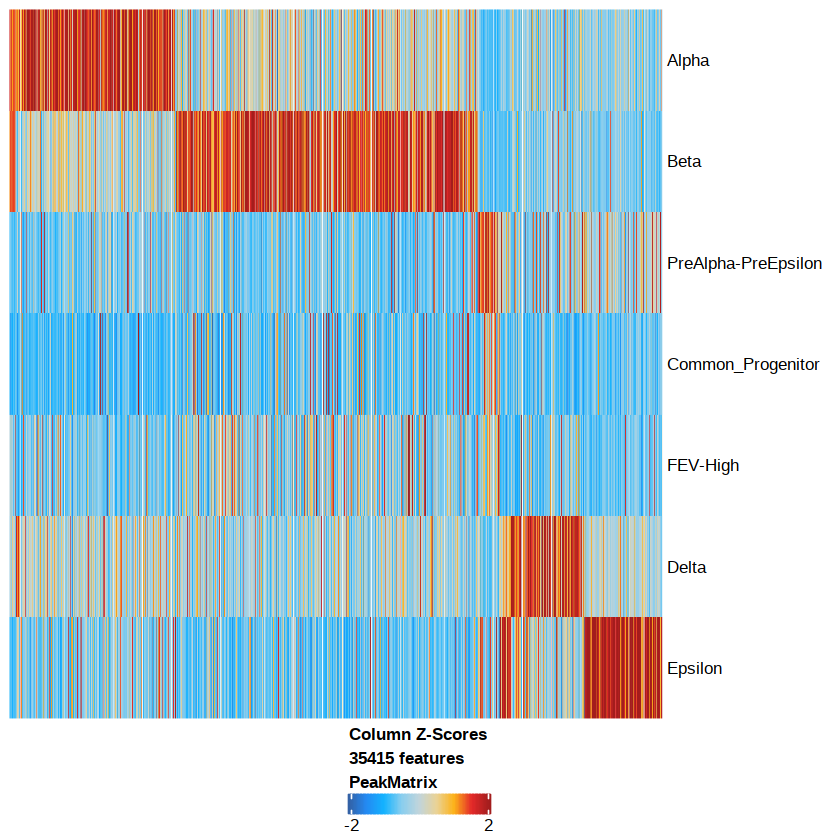

In [100]:
draw(heatmapPeaks, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [101]:
motifsUp <- peakAnnoEnrichment(
    seMarker = markerTest,
    ArchRProj = projEndo2,
    peakAnnotation = "Motif",
    cutOff = "FDR <= 0.1 & Log2FC >= 0.5"
  )

ERROR: Error in is(input, "SummarizedExperiment"): object 'markerTest' not found


In [103]:
markerTest <- getMarkerFeatures(
  ArchRProj = projEndo2, 
  useMatrix = "PeakMatrix",
  groupBy = "Clusters2",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  useGroups = "FEV-High",
  bgdGroups = "Common_Progenitor"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-512f1f68cda5-Date-2020-05-27_Time-12-20-17.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2020-05-27 12:20:18 : Matching Known Biases, 0.004 mins elapsed.

Found less than 100 cells for background matching, Lowering k to 71

2020-05-27 12:20:18 : 

2020-05-27 12:20:18 : Computing Pairwise Tests (1 of 1), 0.012 mins elapsed.

###########
2020-05-27 12:20:41 : Completed Pairwise Tests, 0.399 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-512f1f68cda5-Date-2020-05-27_Time-12-20-17.log



Warning message:
“'markerPlot' is deprecated.
Use 'plotMarkers' instead.
See help("Deprecated")”
Warning message:
“Removed 80 rows containing missing values (geom_point_rast).”


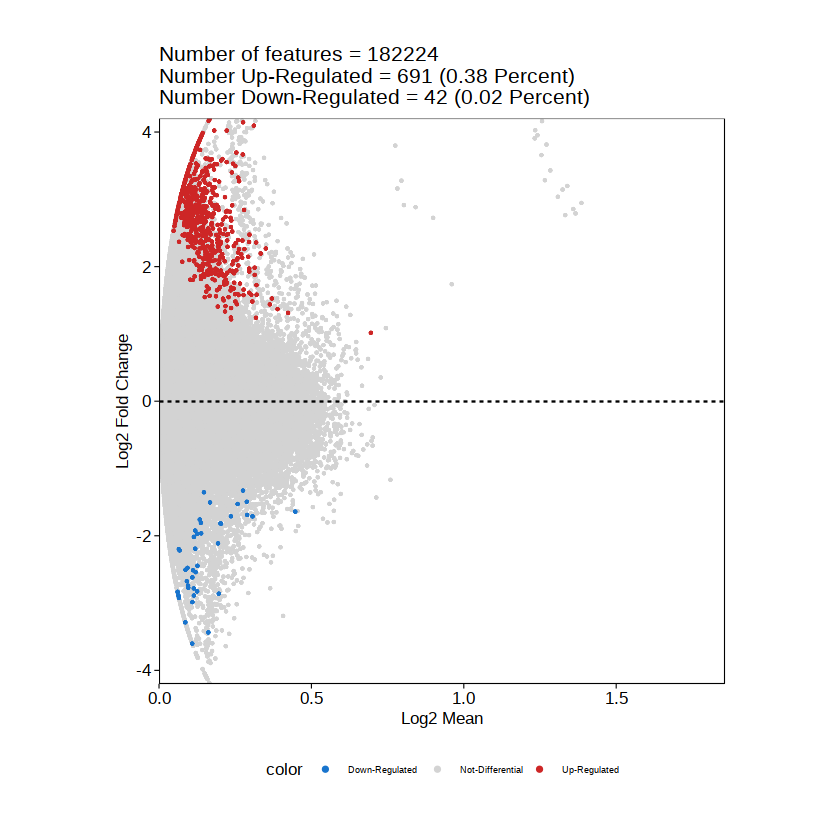

In [105]:
pma <- markerPlot(seMarker = markerTest, name = "FEV-High", cutOff = "FDR <= 0.1 & abs(Log2FC) >= 1", plotAs = "MA")
pma

In [107]:
motifsUp <- peakAnnoEnrichment(
    seMarker = markerTest,
    ArchRProj = projEndo2,
    peakAnnotation = "Motif",
    cutOff = "FDR <= 0.1 & Log2FC >= 0.5"
  )

ArchR logging to : ArchRLogs/ArchR-peakAnnoEnrichment-512f2e28a93-Date-2020-05-27_Time-12-21-49.log
If there is an issue, please report to github with logFile!



ERROR: Error in .SummarizedExperiment.charbound(i, rownames(x), fmt): <RangedSummarizedExperiment>[i,] index out of bounds: chr1826580827080_ chr1827280827780_ ... chrX155881000155881500_ chrX155881964155882464_


[1] "1"     "2"     "3"     "4"     "5"     "6"     "7"     "8"     "9"    
   [10] "10"    "11"    "12"    "13"    "14"    "15"    "16"    "17"    "18"   
   [19] "19"    "20"    "21"    "22"    "23"    "24"    "25"    "26"    "27"   
   [28] "28"    "29"    "30"    "31"    "32"    "33"    "34"    "35"    "36"   
   [37] "37"    "38"    "39"    "40"    "41"    "42"    "43"    "44"    "45"   
   [46] "46"    "47"    "48"    "49"    "50"    "51"    "52"    "53"    "54"   
   [55] "55"    "56"    "57"    "58"    "59"    "60"    "61"    "62"    "63"   
   [64] "64"    "65"    "66"    "67"    "68"    "69"    "70"    "71"    "72"   
   [73] "73"    "74"    "75"    "76"    "77"    "78"    "79"    "80"    "81"   
   [82] "82"    "83"    "84"    "85"    "86"    "87"    "88"    "89"    "90"   
   [91] "91"    "92"    "93"    "94"    "95"    "96"    "97"    "98"    "99"   
  [100] "100"   "101"   "102"   "103"   "104"   "105"   "106"   "107"   "108"  
  [109] "109"   "110"   "111"   "112"   "113"   "114"   "115"   "116"   "117"  
  [118] "118"   "119"   "120"   "121"   "122"   "123"   "124"   "125"   "126"  
  [127] "127"   "128"   "129"   "130"   "131"   "132"   "133"   "134"   "135"  
  [136] "136"   "137"   "138"   "139"   "140"   "141"   "142"   "143"   "144"  
  [145] "145"   "146"   "147"   "148"   "149"   "150"   "151"   "152"   "153"  
  [154] "154"   "155"   "156"   "157"   "158"   "159"   "160"   "161"   "162"  
  [163] "163"   "164"   "165"   "166"   "167"   "168"   "169"   "170"   "171"  
  [172] "172"   "173"   "174"   "175"   "176"   "177"   "178"   "179"   "180"  
  [181] "181"   "182"   "183"   "184"   "185"   "186"   "187"   "188"   "189"  
  [190] "190"   "191"   "192"   "193"   "194"   "195"   "196"   "197"   "198"  
  [199] "199"   "200"   "201"   "202"   "203"   "204"   "205"   "206"   "207"  
  [208] "208"   "209"   "210"   "211"   "212"   "213"   "214"   "215"   "216"  
  [217] "217"   "218"   "219"   "220"   "221"   "222"   "223"   "224"   "225"  
  [226] "226"   "227"   "228"   "229"   "230"   "231"   "232"   "233"   "234"  
  [235] "235"   "236"   "237"   "238"   "239"   "240"   "241"   "242"   "243"  
  [244] "244"   "245"   "246"   "247"   "248"   "249"   "250"   "251"   "252"  
  [253] "253"   "254"   "255"   "256"   "257"   "258"   "259"   "260"   "261"  
  [262] "262"   "263"   "264"   "265"   "266"   "267"   "268"   "269"   "270"  
  [271] "271"   "272"   "273"   "274"   "275"   "276"   "277"   "278"   "279"  
  [280] "280"   "281"   "282"   "283"   "284"   "285"   "286"   "287"   "288"  
  [289] "289"   "290"   "291"   "292"   "293"   "294"   "295"   "296"   "297"  
  [298] "298"   "299"   "300"   "301"   "302"   "303"   "304"   "305"   "306"  
  [307] "307"   "308"   "309"   "310"   "311"   "312"   "313"   "314"   "315"  
  [316] "316"   "317"   "318"   "319"   "320"   "321"   "322"   "323"   "324"  
  [325] "325"   "326"   "327"   "328"   "329"   "330"   "331"   "332"   "333"  
  [334] "334"   "335"   "336"   "337"   "338"   "339"   "340"   "341"   "342"  
  [343] "343"   "344"   "345"   "346"   "347"   "348"   "349"   "350"   "351"  
  [352] "352"   "353"   "354"   "355"   "356"   "357"   "358"   "359"   "360"  
  [361] "361"   "362"   "363"   "364"   "365"   "366"   "367"   "368"   "369"  
  [370] "370"   "371"   "372"   "373"   "374"   "375"   "376"   "377"   "378"  
  [379] "379"   "380"   "381"   "382"   "383"   "384"   "385"   "386"   "387"  
  [388] "388"   "389"   "390"   "391"   "392"   "393"   "394"   "395"   "396"  
  [397] "397"   "398"   "399"   "400"   "401"   "402"   "403"   "404"   "405"  
  [406] "406"   "407"   "408"   "409"   "410"   "411"   "412"   "413"   "414"  
  [415] "415"   "416"   "417"   "418"   "419"   "420"   "421"   "422"   "423"  
  [424] "424"   "425"   "426"   "427"   "428"   "429"   "430"   "431"   "432"  
  [433] "433"   "434"   "435"   "436"   "437"   "438"   "439"   "440"   "441"  
  [442] "442"   "443"   "444"   "445"   "446"   "447"   "448"   "449"   "450"  
  [4

In [24]:
x<-plotTrajectoryHeatmap(trajGSM2,  pal = paletteContinuous(set = "horizonExtra"),  varCutOff = 0, rowOrder = rowOrder,useSeqnames=c('chr1:HES4'))

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f2b668dee-Date-2020-05-28_Time-17-19-39.log
If there is an issue, please report to github with logFile!

No features left in seTrajectory, please check input!



ERROR: Error: 



In [25]:
seqnames(trajGSM2)

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘seqnames’ for signature ‘"SummarizedExperiment"’
